In [1]:
from fastai.tabular import *
import os
from sklearn import preprocessing


In [2]:
path = Path('/Users/bbabu/fastai/DataSamples')

df = pd.read_csv(path/'Output-5v5.csv', sep=',', header=0)
df_test = pd.read_csv(path/'Output-5v5-Test.csv', sep=',', header=0)

In [3]:
df = pd.read_csv(path/'Output-withowners.csv', sep=',', header=0)
df_test = pd.read_csv(path/'Groups_without_Owners_Output.csv', sep=';', header=0)

In [4]:
# ??df_test

In [5]:
df.drop(['Description', 'MemberDN', 'State'], axis=1, inplace=True)
df_test.drop(['Description', 'MemberDN', 'State', 'Owner'], axis=1, inplace=True)


In [6]:
dep_var = 'Owner'
#cat_names = ['GroupDN', 'Member', 'BusinessGroup', 'Platform', 'Title', 'Description', 'Department', 'Country', 'State', 'City']
cat_names = ['GroupDN', 'Member', 'Manager', 'BusinessGroup', 'Platform', 'Title', 'Department', 'Country', 'City']
# cat_names = ['GroupDN', 'Member', 'BusinessGroup', 'Platform', 'Title', 'Description', 'Department', 'Country', 'City']
#cat_names = ['GroupDN', 'Member', 'BusinessGroup', 'Platform', 'Title', 'Department', 'Country', 'City']
#cat_names = ['GroupDN', 'Member', 'BusinessGroup', 'Platform', 'Country', 'City']
# cont_names = ['Manager']
cont_names = []

#txt_cols = ['Description']

# valid_idx = range(len(df)-1000, len(df))
#print(valid_idx)

procs = [FillMissing, Categorify, Normalize]

In [7]:
#??TabularDataBunch.from_df

In [8]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
#         .split_by_idx(list(range(1,1000)))
#         .split_by_idx(valid_idx)
        .split_by_rand_pct(0.7)
        .label_from_df(cols=dep_var)
        .add_test(TabularList.from_df(df_test, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs))
        .databunch())

In [9]:
data.classes

['No', 'Yes']

In [10]:
#learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
#learn = tabular_learner(data, layers=[1000,500], metrics=dice)
learn = tabular_learner(data, layers=[1000,500], metrics=accuracy)

In [11]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(18465, 392)
    (1): Embedding(54272, 600)
    (2): Embedding(3, 3)
    (3): Embedding(31, 11)
    (4): Embedding(9, 5)
    (5): Embedding(20948, 421)
    (6): Embedding(5411, 197)
    (7): Embedding(77, 18)
    (8): Embedding(1665, 102)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=1749, out_features=1000, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=1000, out_features=500, bias=True)
    (4): ReLU(inplace=True)
    (5): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=500, out_features=2, bias=True)
  )
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


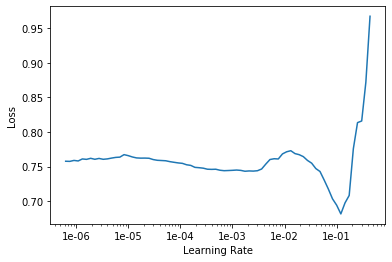

In [12]:
learn.lr_find()
learn.recorder.plot()

In [13]:
#learn.fit(5, 1e-02)
# wd = 0.2

In [14]:
# lr = slice(1e-06,1e-01)

In [15]:
learn.fit_one_cycle(3, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.122735,0.125081,0.959201,23:43
1,0.101278,0.122336,0.960010,34:53
2,0.066932,0.134104,0.952749,28:27


In [16]:
row = df_test.iloc[6]
learn.predict(row)

(Category No, tensor(0), tensor([0.9128, 0.0872]))

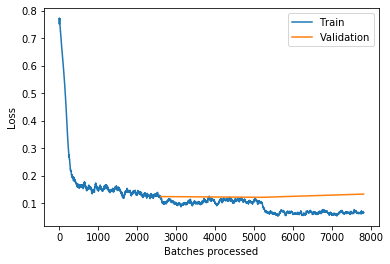

In [17]:
learn.recorder.plot_losses()

[('Yes', 'No', 10852), ('No', 'Yes', 7551)]

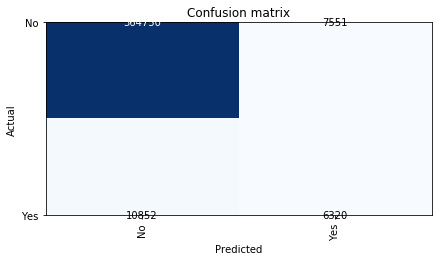

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused()

In [19]:
learn.export()

In [20]:
#??learn.get_preds
#??tabular_learner

In [21]:
preds = learn.get_preds(ds_type=DatasetType.Test)[1].numpy()
#preds = learn.get_preds(ds_type=DatasetType.Valid)[1].numpy()

In [22]:
final_df = pd.DataFrame({'GroupDN': df_test['GroupDN'],'Member': df_test['Member'], 'Manager': df_test['Manager'], 'Owner': preds})
final_df.to_csv(path/'MLProcessed-Fastai.csv', header=True, index=False)

In [23]:
print(preds)
preds.sum()

[0 0 0 0 ... 0 0 0 0]


0

In [24]:
#learn.show_results()